## Task 1: Image Classification with CIFAR-10
Objective: Build a CNN to classify images from the CIFAR-10 dataset.
Steps:
1. Load the CIFAR-10 dataset.
2. Normalize the pixel values.
3. Split the dataset into training and testing sets.
4. Build a simple CNN model with at least three convolutional layers and two max pooling
layers.
5. Compile the model using an appropriate optimizer and loss function.
6. Train the model and evaluate its accuracy.
7. Visualize some test images and their predicted labels.

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
# Step 1: Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


In [6]:
# Step 2: Normalize pixel values (0-255 → 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0
# Step 3: Define class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
# Step 4: Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Step 6: Train the model
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.0995 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.0965 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.0954 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.0992 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.0994 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1013 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.0983 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.0996 - loss: 2

313/313 - 1s - 3ms/step - accuracy: 0.1000 - loss: 2.3026

Test accuracy: 0.1000


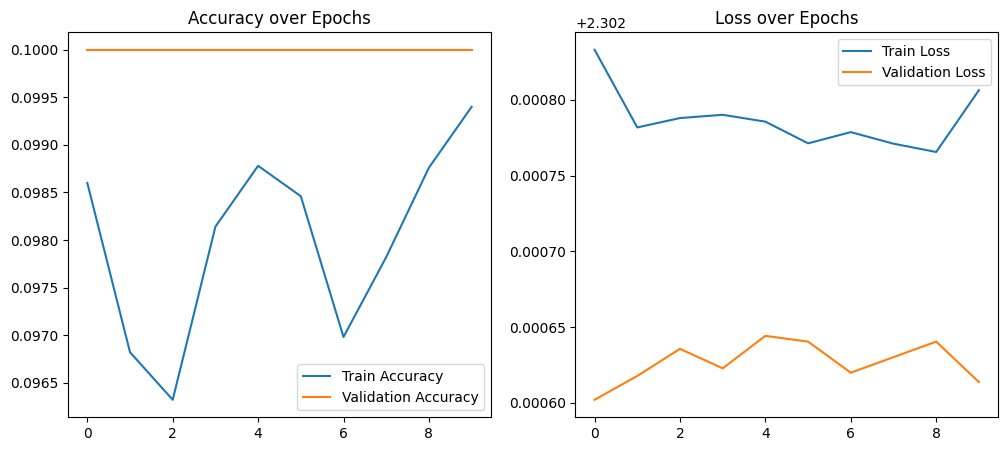

In [10]:
#  Step 7: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# Step 9: Plot training accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


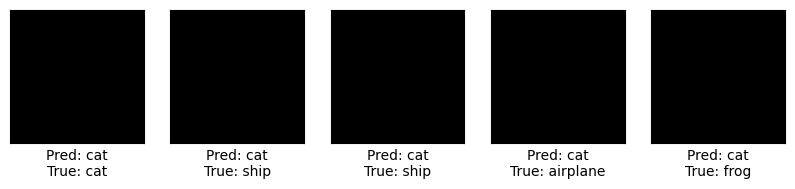

In [12]:
# Step 10: Visualize predictions
predictions = model.predict(x_test)

# Show 5 test images with predicted labels
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    pred_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[y_test[i][0]]
    plt.xlabel(f"Pred: {pred_label}\nTrue: {true_label}")
plt.show()